# 1. Load vitshd

In [67]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds1 = load_dataset("sonlam1102/vithsd")

In [68]:
train1, test1, valid1 = ds1['train'].to_pandas(), ds1['test'].to_pandas(), ds1['validation'].to_pandas()

In [189]:
train1.shape[0], valid1.shape[0], test1.shape[0]

(7000, 1201, 1799)

## 1.1. Data exploration

In [69]:
train1.head()

,Unnamed: 0,content,individual,groups,religion/creed,race/ethnicity,politics
0,5943,Chào nhà báo vũ hoàng Lân. Chào danh hài vũ tr...,2,1,0,0,0
1,6384,Anh Thi nào đi đăng ký rủ anh nhé.,1,0,0,0,0
2,1057,ở mỹ ns cái lồn gì k đc,0,0,0,1,0
3,5258,"Thôn làm vậy là do thôn lầm, thôn lầm nên dân ...",0,0,0,0,0
4,7113,Phạm Văn Lộc fuho trời nắng chóng mặt hả idol,1,0,0,0,0


In [70]:
import pandas as pd

def check_na(df: pd.DataFrame):
    return df.isna().sum().apply(lambda x: x > 0).any()

check_na(train1), check_na(valid1), check_na(test1)

(False, False, True)

In [73]:
print(test1.isna().sum())

Unnamed: 0        0
content           1
individual        0
groups            0
religion/creed    0
race/ethnicity    0
politics          0
dtype: int64


In [74]:
test1 = test1.dropna()

In [75]:
def percent_label_stats(df: pd.DataFrame):
    categorical_fields = df.drop(columns=['content', 'Unnamed: 0'])
    categorical_fields.apply(pd.Series.value_counts)

    return categorical_fields.apply(lambda x: x.value_counts(normalize=True)) * 100

In [76]:
percent_label_stats(train1)

,individual,groups,religion/creed,race/ethnicity,politics
0,21.714286,57.471429,99.657143,92.828571,94.814286
1,35.428571,20.085714,0.114286,1.714286,0.528571
2,16.700000,9.128571,0.114286,2.328571,1.157143
3,26.157143,13.314286,0.114286,3.128571,3.500000


In [78]:
percent_label_stats(valid1)

,individual,groups,religion/creed,race/ethnicity,politics
0,21.898418,56.952540,99.333888,93.838468,95.253955
1,37.801832,22.148210,0.499584,1.248959,0.333056
2,15.736886,7.993339,0.083264,1.998335,0.915903
3,24.562864,12.905912,0.083264,2.914238,3.497086


In [77]:
percent_label_stats(test1)

,individual,groups,religion/creed,race/ethnicity,politics
0,22.290161,57.254030,99.666481,92.829350,95.052807
1,34.352418,19.788772,0.166759,2.223457,0.555864
2,18.010006,10.283491,0.111173,1.889939,1.167315
3,25.347415,12.673708,0.055586,3.057254,3.224013


## 1.2. Labeling 0 / 1

In [82]:
categorical_fields = train1.select_dtypes('int').drop(columns=['Unnamed: 0']).columns

In [ ]:
train1['toxic'] = train1[categorical_fields].gt(1).any(axis=1).astype('int')

train1.toxic.value_counts()

toxic
1    3588
0    3412
Name: count, dtype: int64

In [85]:
valid1['toxic'] = valid1[categorical_fields].gt(1).any(axis=1).astype('int')

valid1.toxic.value_counts()

toxic
0    621
1    580
Name: count, dtype: int64

In [84]:
test1['toxic'] = test1[categorical_fields].gt(1).any(axis=1).astype('int')

test1.toxic.value_counts()

toxic
1    934
0    865
Name: count, dtype: int64

## 1.3. Filtering

In [86]:
target_fields = ['content', 'toxic']

In [87]:
train1 = train1[target_fields]
valid1 = valid1[target_fields]
test1 = test1[target_fields]

## 1.4. Saving

In [91]:
train1.to_csv('data/huggingface/vitshd/train.csv', index=False, mode='w')
valid1.to_csv('data/huggingface/vitshd/valid.csv', index=False, mode='w')
test1.to_csv('data/huggingface/vitshd/test.csv', index=False, mode='w')

In [177]:
train1.to_csv('data/train.csv', index=False, mode='w')
valid1.to_csv('data/valid.csv', index=False, mode='w')
test1.to_csv('data/test.csv', index=False, mode='w')

# 2. Load ViCTSD

In [93]:
from datasets import load_dataset
ds2 = load_dataset("tarudesu/ViCTSD")

train2, test2, valid2 = ds2['train'].to_pandas(), ds2['test'].to_pandas(), ds2['validation'].to_pandas()

train2.shape, test2.shape, valid2.shape

((7000, 6), (1000, 6), (2000, 6))

## 2.1. Data exploration

In [94]:
train2.head()

,Unnamed: 0,Comment,Constructiveness,Toxicity,Title,Topic
0,6326,Thật tuyệt vời...!!!,0,0,Những 'bước tiến diệu kỳ' của Trúc Nhi - Diệu Nhi,SucKhoe
1,7835,"mỹ đã tuột dốc quá nhiều rồi, giờ muốn vực dậy...",1,0,Hình tượng Mỹ sụp đổ trong lòng người dân thế ...,TheGioi
2,4690,tôi thấy người lái xe hơi bấm còi mới là người...,1,1,Cả trăm người đạp xe thể dục bịt kín đường,OtoXemay
3,6011,Coi dịch là giặc. Đã mang tên đó mà xâm nhập V...,0,0,11 ngày không lây nhiễm nCoV cộng đồng,SucKhoe
4,9303,Thương các bé quá! Các con còn quá nhỏ mà đã p...,0,0,5 trẻ chết đuối dưới ao,ThoiSu


In [95]:
check_na(train2), check_na(valid2), check_na(test2)

(False, False, False)

In [96]:
train2.Toxicity.value_counts()

Toxicity
0    6241
1     759
Name: count, dtype: int64

In [97]:
train2.groupby('Topic').Toxicity.apply(lambda x: x.sum() / x.count() * 100)

Topic
GiaiTri      17.464789
GiaoDuc      16.453901
KhoaHoc       3.239437
KinhDoanh     5.857143
OtoXemay      6.821480
PhapLuat     36.000000
SucKhoe       4.329609
TheGioi       8.625731
TheThao       8.308605
ThoiSu        1.404494
Name: Toxicity, dtype: float64

## 2.2. Filtering

In [98]:
train2 = train2[['Comment', 'Toxicity']]
valid2 = valid2[['Comment', 'Toxicity']]
test2 = test2[['Comment', 'Toxicity']]

train2.columns = valid2.columns = test2.columns = target_fields

## 2.3. Saving

In [99]:
train2.to_csv('data/huggingface/ViCTSD/train.csv', index=False, mode='w')
valid2.to_csv('data/huggingface/ViCTSD/valid.csv', index=False, mode='w')
test2.to_csv('data/huggingface/ViCTSD/test.csv', index=False, mode='w')

In [178]:
train2.to_csv('data/train.csv', index=False, header=False, mode='a')
valid2.to_csv('data/valid.csv', index=False, header=False, mode='a')
test2.to_csv('data/test.csv', index=False, header=False, mode='a')

# 3. Load vietnamese-social-comments

In [103]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds3 = load_dataset("vanhai123/vietnamese-social-comments")

In [104]:
train3 = ds3['train'].to_pandas()

## 3.1. Data exploration

In [105]:
train3.head()

,comment,label,category
0,Video này hay quá! Cảm ơn bạn đã chia sẻ,positive,compliment
1,Chúc mừng bạn nhé! Thật sự rất tuyệt vời,positive,congratulation
2,"Bài viết rất bổ ích, tôi đã học được nhiều điều",positive,appreciation
3,Tôi rất thích phong cách của bạn,positive,compliment
4,Cảm ơn bạn rất nhiều vì đã giúp đỡ,positive,gratitude


In [106]:
check_na(train3)

False

In [107]:
train3.label.value_counts()

label
positive    1432
toxic       1274
negative    1187
neutral     1003
Name: count, dtype: int64

In [108]:
train3[['label']].apply(lambda x: x.value_counts(normalize=True)) * 100

,label
label,
positive,29.248366
toxic,26.021242
negative,24.244281
neutral,20.486111


## 3.2. Labeling 0 / 1

In [109]:
train3['toxic'] = (train3.label == 'toxic').astype('int')

## 3.3. Filtering

In [110]:
train3 = train3[['comment', 'toxic']]

train3.columns = target_fields

## 3.4. Splitting

In [111]:
from sklearn.model_selection import train_test_split

train3, test3 = train_test_split(train3, test_size=0.2, random_state=42, shuffle=True)
train3, valid3 = train_test_split(train3, test_size=0.1, random_state=42, shuffle=True)

## 3.5. Saving

In [113]:
train3.to_csv('data/huggingface/vietnamese-social-comments/train.csv', index=False, mode='w')
train3.to_csv('data/huggingface/vietnamese-social-comments/valid.csv', index=False, mode='w')
train3.to_csv('data/huggingface/vietnamese-social-comments/test.csv', index=False, mode='w')

In [179]:
train2.to_csv('data/train.csv', index=False, header=False, mode='a')
valid2.to_csv('data/valid.csv', index=False, header=False, mode='a')
test2.to_csv('data/test.csv', index=False, header=False, mode='a')

# 4. Load ViHSD

##

In [115]:
from datasets import load_dataset

ds4 = load_dataset("htdung167/ViHSD")

In [116]:
train4, test4, valid4 = ds4['train'].to_pandas(), ds4['test'].to_pandas(), ds4['validation'].to_pandas()

In [190]:
train4.shape[0], valid4.shape[0], test4.shape[0]

(24046, 2672, 6680)

## 4.1. Data exploration

In [117]:
train4.head()

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0


In [118]:
check_na(train4), check_na(valid4), check_na(test4)

(True, False, False)

In [119]:
train4.isna().sum()

free_text    2
label_id     0
dtype: int64

In [120]:
train4 = train4.dropna()

In [121]:
train4.label_id.value_counts() / train4.shape[0] * 100

label_id
0    82.695667
2    10.629627
1     6.674707
Name: count, dtype: float64

## 4.2. Labeling 0 / 1

In [122]:
mapping = {0: 0, 1: 1, 2 : 1}

train4.label_id = train4.label_id.map(mapping)
valid4.label_id = valid4.label_id.map(mapping)
test4.label_id = test4.label_id.map(mapping)

## 4.3. Rename

In [123]:
train4.columns = target_fields
valid4.columns = target_fields
test4.columns = target_fields

## 4.4. Saving

In [124]:
train4.to_csv('data/huggingface/ViHSD/train.csv', index=False, mode='w')
valid4.to_csv('data/huggingface/ViHSD/valid.csv', index=False, mode='w')
test4.to_csv('data/huggingface/ViHSD/test.csv', index=False, mode='w')

In [180]:
train4.to_csv('data/train.csv', index=False, header=False, mode='a')
valid4.to_csv('data/valid.csv', index=False, header=False, mode='a')
test4.to_csv('data/test.csv', index=False, header=False, mode='a')

## 5. Crawl

Source:
- https://www.reddit.com/r/VietNamNation/comments/1my2y2z/review_phim_m%C6%B0a_%C4%91%E1%BB%8F_c%E1%BB%A7a_b%C3%B2_%C4%91%E1%BB%8F_l%C3%A0m/
- https://tinhte.vn/thread/review-phim-mua-do.4051064/
- https://www.facebook.com/cuongphimreview/posts/quick-review-m%C6%B0a-%C4%91%E1%BB%8F-kh%C3%B3c-%C4%91%E1%BB%A7-124-ph%C3%BAt-phim-t%E1%BB%B1-h%C3%A0o-qu%C3%A1-vi%E1%BB%87t-nam-%C6%A1i-/843161544897675/

## 5.1. VN Express

In [126]:
vnexpress_sources = [
    'https://vnexpress.net/giai-tri/phim/thu-vien-phim/mua-do-830',
    'https://vnexpress.net/tinh-tiet-phim-mua-do-vap-phan-ung-4939283.html',
    'https://vnexpress.net/mua-do-tranh-giai-oscar-2026-4945632.html',
    'https://vnexpress.net/hon-8-trieu-luot-khan-gia-xem-mua-do-4944569.html',
    'https://vnexpress.net/steven-nguyen-lam-soat-ve-truoc-khi-dong-mua-do-4937024.html',
    'https://vnexpress.net/buc-anh-nu-cuoi-nguoi-linh-thanh-co-quang-tri-gay-xuc-dong-4935986.html',
    'https://vnexpress.net/ly-do-phim-mua-do-gay-sot-4933949.html'
]

In [127]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

def crawl_comment_vnexpress(src):
    options = webdriver.ChromeOptions()
    options.add_argument("--headless=new")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    driver.get(src)
    time.sleep(2)

    wait = WebDriverWait(driver, 5)

    # --- click nút "Xem thêm" đến khi không còn ---
    while True:
        try:
            btn = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#show_more_coment")))
            driver.execute_script("arguments[0].click();", btn)  # click bằng JS để chắc ăn
            time.sleep(1.5)
        except:
            break

    # --- Click tất cả các nút view all reply ---
    while True:
        try:
            btns = driver.find_elements(By.CSS_SELECTOR, "#box_comment .view_all_reply")
            if not btns:
                break
            for b in btns:
                try:
                    driver.execute_script("arguments[0].click();", b)
                    time.sleep(0.5)
                except:
                    continue
        except:
            break

    # --- click "Đọc tiếp" (mở rộng comment dài) ---
    more_btns = driver.find_elements(By.CSS_SELECTOR, "#box_comment .continue-reading")
    for b in more_btns:
        try:
            driver.execute_script("arguments[0].click();", b)
            time.sleep(0.2)
        except:
            continue

    # --- lấy toàn bộ comment ---
    selector = "#box_comment .full_content, #box_comment .content_more"
    elems = driver.find_elements(By.CSS_SELECTOR, selector)

    rows = []
    for i, e in enumerate(elems, 1):
        # text đầy đủ (gồm cả tên + comment)
        full_text = e.text.strip()
        # thử lấy tên trong span
        try:
            name = e.find_element(By.CSS_SELECTOR, ".txt-name").text.strip()
        except:
            name = ""
        # comment = full_text bỏ đi name
        comment = full_text.replace(name, "", 1).strip()

        rows.append(comment)

    driver.quit()
    return rows

In [128]:
vnexpress_corpus = []
for i, src in enumerate(vnexpress_sources):
    print(f'crawling src {i+1}: {src}')
    vnexpress_corpus += crawl_comment_vnexpress(src)

crawling src 1: https://vnexpress.net/giai-tri/phim/thu-vien-phim/mua-do-830
crawling src 2: https://vnexpress.net/tinh-tiet-phim-mua-do-vap-phan-ung-4939283.html
crawling src 3: https://vnexpress.net/mua-do-tranh-giai-oscar-2026-4945632.html
crawling src 4: https://vnexpress.net/hon-8-trieu-luot-khan-gia-xem-mua-do-4944569.html
crawling src 5: https://vnexpress.net/steven-nguyen-lam-soat-ve-truoc-khi-dong-mua-do-4937024.html
crawling src 6: https://vnexpress.net/buc-anh-nu-cuoi-nguoi-linh-thanh-co-quang-tri-gay-xuc-dong-4935986.html
crawling src 7: https://vnexpress.net/ly-do-phim-mua-do-gay-sot-4933949.html


In [129]:
vnexpress_corpus = pd.DataFrame(vnexpress_corpus, columns=['content'])
vnexpress_corpus.to_csv('data/crawl/crawl.csv', mode='w', index=False)
vnexpress_corpus.to_csv('data/crawl/vnexpress.csv', mode='w', index=False)

## 5.2. Reddit

In [130]:
reddit_sources = [
    'https://www.reddit.com/r/VietNamNation/comments/1my2y2z/review_phim_m%C6%B0a_%C4%91%E1%BB%8F_c%E1%BB%A7a_b%C3%B2_%C4%91%E1%BB%8F_l%C3%A0m/.json',
    'https://www.reddit.com/r/VietNamNation/comments/1n3yg7m/b%C3%A0i_vi%E1%BA%BFt_b%C3%ACnh_lu%E1%BA%ADn_v%E1%BB%81_phim_m%C6%B0a_%C4%91%E1%BB%8F/.json',
    'https://www.reddit.com/r/TroChuyenLinhTinh/comments/1nbg54q/tôi_xem_để_bạn_khỏi_phải_xem_review_mưa_đỏ/.json',
    'https://www.reddit.com/r/VietNamNation/comments/1neu069/1_b%E1%BA%A1n_b%C3%B2_%C4%91%E1%BB%8F_n%C3%B3i_v%E1%BB%81_m%C6%B0a_%C4%91%E1%BB%8F_ch%E1%BB%A7a_l%E1%BB%99t_t%E1%BA%A3_h%E1%BA%BFt_t%E1%BB%99i_%C3%A1c/.json',
    'https://www.reddit.com/r/VietNamNation/comments/1n2vzpa/tao_ra_r%E1%BB%93i_t%E1%BB%A5i_m%C3%A0y_%C6%A1i_phim_m%C6%B0a_%C4%91%E1%BB%8F_v%C6%B0%E1%BB%A3t_m%E1%BA%B7t_si%C3%AAu/.json',
    'https://www.reddit.com/r/VietNamNation/comments/1nes3ea/m%C6%B0a_%C4%91%E1%BB%8F_s%E1%BB%B1_th%E1%BA%ADt_b%E1%BB%8B_b%C3%B3p_m%C3%A9o/.json',
]

In [131]:
import requests

url = "https://www.reddit.com/r/VietNamNation/comments/1my2y2z/review_phim_m%C6%B0a_%C4%91%E1%BB%8F_c%E1%BB%A7a_b%C3%B2_%C4%91%E1%BB%8F_l%C3%A0m/.json"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"}
raw = requests.get(url, headers=headers).json()

def parse_comments(children, comments=[]):
    for c in children:
        if c["kind"] != "t1":  # t1 = comment
            continue
        body = c["data"].get("body")
        if body:
            yield body
        
        replies = c["data"].get("replies")
        if replies and isinstance(replies, dict):
            yield from parse_comments(replies["data"]["children"], comments)

def crawl_comment_reddit(src):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"}
    raw = requests.get(src, headers=headers).json()

    return parse_comments(raw[1]["data"]["children"])

In [132]:
reddit_corpus = []
for i, src in enumerate(reddit_sources):
    print(f'crawling src {i+1}: {src}')
    reddit_corpus += crawl_comment_reddit(src)

crawling src 1: https://www.reddit.com/r/VietNamNation/comments/1my2y2z/review_phim_m%C6%B0a_%C4%91%E1%BB%8F_c%E1%BB%A7a_b%C3%B2_%C4%91%E1%BB%8F_l%C3%A0m/.json
crawling src 2: https://www.reddit.com/r/VietNamNation/comments/1n3yg7m/b%C3%A0i_vi%E1%BA%BFt_b%C3%ACnh_lu%E1%BA%ADn_v%E1%BB%81_phim_m%C6%B0a_%C4%91%E1%BB%8F/.json
crawling src 3: https://www.reddit.com/r/TroChuyenLinhTinh/comments/1nbg54q/tôi_xem_để_bạn_khỏi_phải_xem_review_mưa_đỏ/.json
crawling src 4: https://www.reddit.com/r/VietNamNation/comments/1neu069/1_b%E1%BA%A1n_b%C3%B2_%C4%91%E1%BB%8F_n%C3%B3i_v%E1%BB%81_m%C6%B0a_%C4%91%E1%BB%8F_ch%E1%BB%A7a_l%E1%BB%99t_t%E1%BA%A3_h%E1%BA%BFt_t%E1%BB%99i_%C3%A1c/.json
crawling src 5: https://www.reddit.com/r/VietNamNation/comments/1n2vzpa/tao_ra_r%E1%BB%93i_t%E1%BB%A5i_m%C3%A0y_%C6%A1i_phim_m%C6%B0a_%C4%91%E1%BB%8F_v%C6%B0%E1%BB%A3t_m%E1%BA%B7t_si%C3%AAu/.json
crawling src 6: https://www.reddit.com/r/VietNamNation/comments/1nes3ea/m%C6%B0a_%C4%91%E1%BB%8F_s%E1%BB%B1_th%E1%BA%ADt_b%E1%

In [133]:
reddit_corpus = pd.DataFrame(reddit_corpus, columns=['content'])
reddit_corpus.to_csv('data/crawl/crawl.csv', mode='a', index=False, header=False)
reddit_corpus.to_csv('data/crawl/reddit.csv', mode='w', index=False)

## 5.3. Facebook

used apify

In [135]:
import pandas as pd

files = [
    'data/crawl/dataset_facebook-comments-scraper_2025-10-03_02-49-45-712.csv',
    'data/crawl/dataset_facebook-comments-scraper_2025-10-03_03-10-41-614.csv'
]

facebook_corpus = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

In [136]:
facebook_corpus.columns = ['content']

In [137]:
facebook_corpus.to_csv('data/crawl/crawl.csv', mode='a', index=False, header=False)
facebook_corpus.to_csv('data/crawl/facebook.csv', mode='w', index=False)

## 5.4. Auto labeling

In [ ]:
import pandas as pd
crawled_corpus = pd.read_csv('data/crawl/crawl.csv', header=None, names=['content'])

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F
from tqdm import tqdm

model_name = 'naot97/vietnamese-toxicity-detection_1'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

model.to('cuda')
model.eval()

labels = []

with torch.no_grad():
    for text in tqdm(crawled_corpus.content, desc='Predicting'):
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=256).to('cuda')

        outputs = model(**inputs)
        logits = outputs.logits

        probs = F.softmax(logits, dim=-1).squeeze(0)
        _, toxicity = probs.detach().cpu().numpy()

        if toxicity < 0.1:
            labels.append(0)
        elif toxicity > 0.9:
            labels.append(1)
        else:
            labels.append(toxicity)

crawled_corpus['label'] = labels
crawled_corpus.to_csv('data/crawl_labeled/crawl_auto_labeled.csv', index=False)

Predicting: 100%|██████████| 3201/3201 [02:42<00:00, 19.70it/s]


## 5.5. Manual labeling

In [ ]:
import pandas as pd

auto_labeled_corpus = pd.read_csv('data/crawl_labeled/craw_auto_labeled.csv')

In [23]:
auto_labeled_corpus.query('0 < label < 1').label.count().item()

721

In [ ]:
## For using label-studio

import json

tasks = []
for _, row in auto_labeled_corpus.query('0 < label < 1').iterrows():
    tasks.append({
        "data": {
            "text": row["content"],
            "prob": float(row["label"])
        }
    })

with open("data/meta/tasks.json", "w", encoding="utf-8") as f:
    json.dump(tasks, f, ensure_ascii=False, indent=2)

### using label-studio:

pip install label-studio

label-studio start

Open http://localhost:8080

## 5.7. Splitting

In [181]:
manual_labeled_corpus = pd.read_csv('data/crawl_labeled/crawl_manual_labeled.csv')

manual_labeled_corpus = manual_labeled_corpus[['text', 'sentiment']]
manual_labeled_corpus.columns = target_fields

manual_labeled_corpus.toxic = manual_labeled_corpus.toxic.astype('int')

In [182]:
auto_labeled_corpus = pd.read_csv('data/crawl_labeled/crawl_auto_labeled.csv')

auto_labeled_corpus = auto_labeled_corpus.query('label == 0 | label == 1')

auto_labeled_corpus.columns = target_fields

auto_labeled_corpus.toxic = auto_labeled_corpus.toxic.astype('int')

In [183]:
train_crawled = pd.concat([auto_labeled_corpus, manual_labeled_corpus], ignore_index=True)

In [ ]:
train_crawled, test_crawled = train_test_split(train_crawled, test_size=0.2, random_state=42, shuffle=True)
train_crawled, valid_crawled = train_test_split(train_crawled, test_size=0.1, random_state=42, shuffle=True)

## 5.7. Saving

In [185]:
train_crawled.to_csv('data/crawl_labeled/train.csv', index=False, mode='w')
valid_crawled.to_csv('data/crawl_labeled/valid.csv', index=False, mode='w')
test_crawled.to_csv('data/crawl_labeled/test.csv', index=False, mode='w')

In [186]:
train_crawled.to_csv('data/train.csv', index=False, header=False, mode='a')
valid_crawled.to_csv('data/valid.csv', index=False, header=False, mode='a')
test_crawled.to_csv('data/test.csv', index=False, header=False, mode='a')

# 6. Generalize

In [187]:
train = pd.read_csv('data/train.csv')
valid = pd.read_csv('data/valid.csv')
test = pd.read_csv('data/test.csv')

In [193]:
n = train.shape[0] + valid.shape[0] + test.shape[0]

print(f'Total data: {n}')
print(f'Train: {train.shape[0]} ~ {train.shape[0] / n * 100:.2f}%')
print(f'Validation: {valid.shape[0]} ~ {valid.shape[0] / n * 100:.2f}%')
print(f'Test: {test.shape[0]} ~ {test.shape[0] / n * 100:.2f}%')

Total data: 66599
Train: 46774 ~ 70.23%
Validation: 8065 ~ 12.11%
Test: 11760 ~ 17.66%


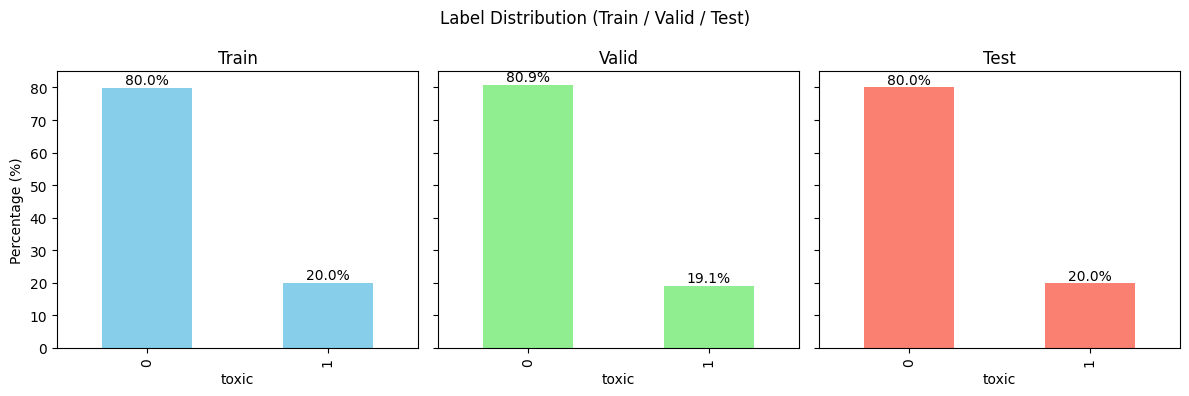

In [201]:
import matplotlib.pyplot as plt

train_counts = train['toxic'].value_counts(normalize=True) * 100
valid_counts = valid['toxic'].value_counts(normalize=True) * 100
test_counts  = test['toxic'].value_counts(normalize=True) * 100

# Tạo figure với 3 subplot (1 hàng 3 cột)
fig, axes = plt.subplots(1, 3, figsize=(12,4), sharey=True)

# Train
train_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Train")
axes[0].set_ylabel("Percentage (%)")
for i, v in enumerate(train_counts):
    axes[0].text(i, v+1, f"{v:.1f}%", ha='center')

# Valid
valid_counts.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title("Valid")
for i, v in enumerate(valid_counts):
    axes[1].text(i, v+1, f"{v:.1f}%", ha='center')

# Test
test_counts.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title("Test")
for i, v in enumerate(test_counts):
    axes[2].text(i, v+1, f"{v:.1f}%", ha='center')

plt.suptitle("Label Distribution (Train / Valid / Test)")
plt.tight_layout()
plt.show()